#                                        Restaurant Revenue Prediction

# **Introduction:**

Food industry plays a crucial part in the enhancement of the country’s economy. This mainly plays a key role in metropolitan cities. Where restaurants are essential parts of social gatherings and in recent days there are different varieties of quick-service restaurants like food trucks and takeaways. With this recent rise in restaurant types, it is difficult to decide when and where to open a new restaurant. 


**Overview of the competition:**

Over 1,200 quick service restaurants across the globe, TFI is the company where it owns several well-known restaurants across different parts of the Europe and Asia.They employ over 20,000 people in Europe and Asia and make significant daily investments in developing new restaurant sites.
We have been encountered with four different types of restaurants. They are inline, mobile, drive-thru, and food court. So deciding to open a new restaurant is challenging with these emerging quick-service restaurants.   

In recent days, even restaurant sites also include a large investment of time and capital. Geographical locations and cultures also impact the long-time survival of the firm.
With the subjective data, it is difficult to extrapolate the place where to open a new restaurant. So TF1 needs a model such that they can effectively invest in new restaurant sites. This competition is to predict the annual restaurant sales of 100,000 regional locations.


**Type of Machine learning problem:**

We are asked to predict the revenue of the restaurant in a given year, this problem can be best framed as a Regression problem.


# **Data Overview:**

Dataset: https://www.kaggle.com/c/restaurant-revenue-prediction/data

TFI company has provided a dataset with 137 restaurants in training phase and 100,000 restaurants for testing phase.
*   Id: Restaurant ID
*   Open Date: Opening date of a restaurant
*   City:  City where restaurant is located
*   City Group: Type of the city. Big cities, or Other.
*   Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru,   MB: Mobile
*   P1- P37: There are three categories of these obfuscated data.
    *   Demographic data are gathered from third party providers with GIS systems. 
These include population in any given area, age and gender distribution, development scales.
    *   Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability.

    *  Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
*   Revenue: The revenue column indicates transformed revenue of the restaurant in a given year and is the target of predictive analysis

City, City Group, Type are categorical variables.\
P1-P37, Revenue are continuous variables.


# **Evaluation Metric:**

Let's discuss here with most efficient and commonly used evaluation metrics in regression problems.\
**Root Mean Squared Error(RMSE):** \
**RMSE** is the most popular evaluation metric where it follows an assumption that errors obtained are unbiased and follow a normal distribution. RMSE is the square root of average squared residuals/errors. \
Residuals = y_actual - y_predicted
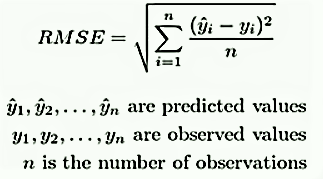

Here, the errors are squared before they get averaged, this implies that higher weight is assigned to larger errors which means model performance gets drastically affected when large errors are present. \
The **Squareroot** in RMSE makes the scale of the errors be in scale as the scale of the target variable. \
Example: Let's consider target variable 'revenue' has its unit in 'dollars', then RMSE will have its unit in 'dollars'. \
The **Square term** in RMSE prevents canceling the positive and negative error values. \
As RMSE is highly affected by outlier values, it is mandatory to handle outliers from the data before using this metric. 
Lower the value better is the performance of the model.

**Root Mean Squared Logarithmic Error(RMSLE):** \
**RMSLE** is similar to RMSE but where the error term is calculated at a logarithmic scale. \
In the case of RMSE, the presence of outliers increases the error term to a very large value. But, in the case of RMLSE, the outliers are drastically scaled-down. When we don't want to influence results, if there are large errors then RMSLE can be taken into consideration. \
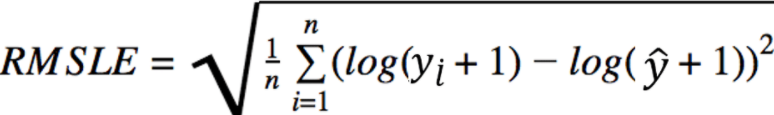
 \
Here we are adding 1 as a constant to both actual and predicted values because if the logarithmic term is 0 then it reaches infinitely large. \

Predicted value - SMALL &  Actual value - SMALL : RMSE and RMSLE are same \
Either Predicted value or  Actual value - LARGE : RMSE > RMSLE \
Predicted value - LARGE  &  Actual value - LARGE : RMSE > RMSLE

In this dataset, actual and predicted values are large. Hence we can consider RMSE as an evaluation metric.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from google.colab import files
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train = pd.read_csv("/content/drive/MyDrive/Case study1/train.csv")
train.head(2)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0


In [3]:
test = pd.read_csv("/content/drive/MyDrive/Case study1/test.csv")
test.head(2)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0


In [4]:
train['City'].unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [5]:
print("train shape",train.shape,"test shape",test.shape)
print(train.columns)

train shape (137, 43) test shape (100000, 42)
Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')


**Missing Values**

In [6]:
#Returns a boolean value "True",  if there exists atleast one missing value in the column 
train.isna().any().any()

False

In [7]:
test.isna().any().any()

False

**Analyzing target variable** - ***'revenue'***

In [8]:
train['revenue'].describe()

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64

[Text(0.5, 1.0, 'Box Plot for Revenue variable')]

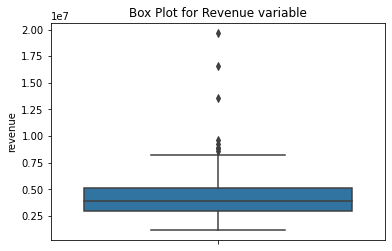

In [9]:
sns.boxplot(y = train['revenue']).set(title="Box Plot for Revenue variable") #single vertical boxplot

In [10]:
for i in range(90,100,1):
  print(i,"th percentile :",np.percentile(train['revenue'],i).round(3))

90 th percentile : 7045417.4
91 th percentile : 7213830.0
92 th percentile : 7506753.6
93 th percentile : 7723386.88
94 th percentile : 8157828.64
95 th percentile : 8683465.2
96 th percentile : 8899910.16
97 th percentile : 9234060.4
98 th percentile : 10750754.72
99 th percentile : 15478481.6


Text(0.5, 1.0, 'Distribution plot for revenue')

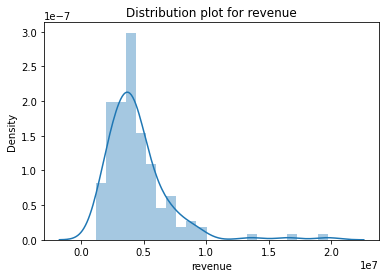

In [11]:
ax = sns.distplot(train['revenue'])
ax.set_title("Distribution plot for revenue") 

From above plot it is clear that we experience skewness in the target variable. We can observe that '**revenue**' variable is right skewed/positively skewed.
This skewness caused due to outliers. These outliers appeared might be due to a few retaurants really having higher revenue or mistakenly choosen values.
We can apply some transformations to the variable which decreases the effect of outliers.

Text(0.5, 1.0, 'Square distribution plot for revenue')

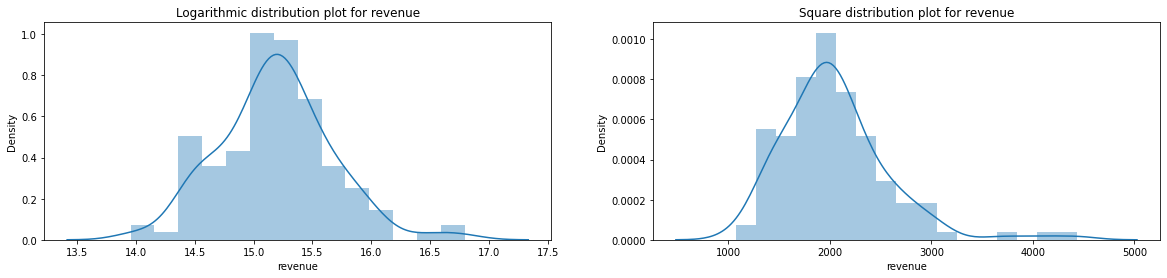

In [12]:
fig, ax = plt.subplots(1,2,figsize=(20,4))

sns.distplot(np.log(train['revenue']),ax=ax[0]).set_title("Logarithmic distribution plot for revenue")

sns.distplot(np.sqrt(train['revenue']),ax=ax[1]).set_title("Square distribution plot for revenue")

Both 'log' and 'sqrt' transformations are still right skewed to some extent.   Here logarithmic distribution of '**revenue**' variable tends more towards normal distribution.

# **Categorical Features**

**Analyzing 'Type' column**

Training set :
FC    76
IL    60
DT     1
Name: Type, dtype: int64
-------------
Testing set :
FC    57019
IL    40447
DT     2244
MB      290
Name: Type, dtype: int64


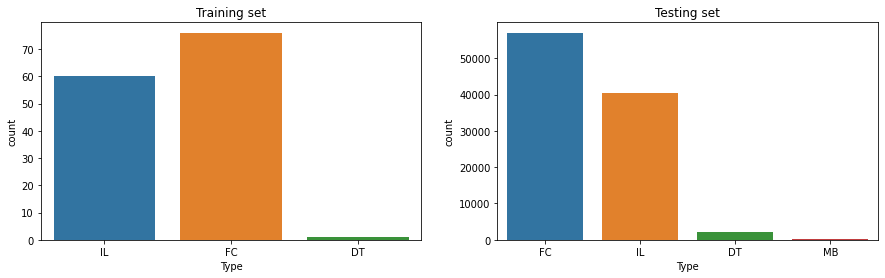

In [13]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
sns.countplot(x=train['Type'],ax=ax[0]).set_title("Training set")
print("Training set :")
print(train['Type'].value_counts())

sns.countplot(x=test['Type'],ax=ax[1]).set_title("Testing set")
print("-------------")
print("Testing set :")
print(test['Type'].value_counts())

The above plots represent the count of different types of restaurants in training and testing datasets. \
Since the count of 'DT'(drive-thru) &, 'MB'(mobile) is very less, which indicates these two are the less preferred type of restaurants where 'FC'(Food Court) is the most preferred type of restaurant. \
**Note**: There is no single occurrence of 'MB' (mobile restaurants) in the training dataset.

**Analyzing 'City Group' column**

Training set :
Big Cities    78
Other         59
Name: City Group, dtype: int64
-------------
Testing set :
Other         50728
Big Cities    49272
Name: City Group, dtype: int64


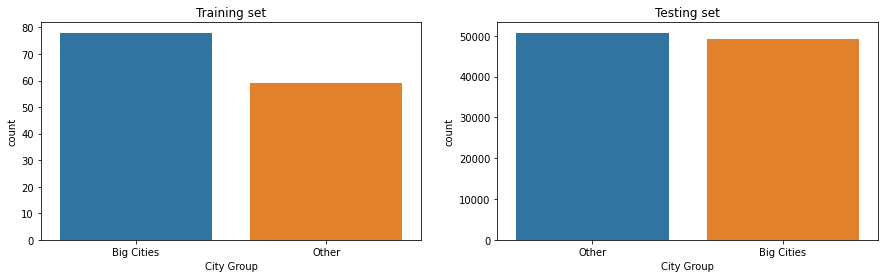

In [14]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
sns.countplot(x=train['City Group'],ax=ax[0]).set_title("Training set")
print("Training set :")
print(train['City Group'].value_counts())

sns.countplot(x=test['City Group'],ax=ax[1]).set_title("Testing set")
print("-------------")
print("Testing set :")
print(test['City Group'].value_counts())

The above plots describe the count of the '**City Group**' feature in training and testing datasets. \
Here 'Big Cities' are slightly more than 'Other' in the training phase. But that shouldn't be a problem during modeling. 

**Analyzing 'City' column**

Text(0.5, 1.0, 'Countplot for City - Training set')

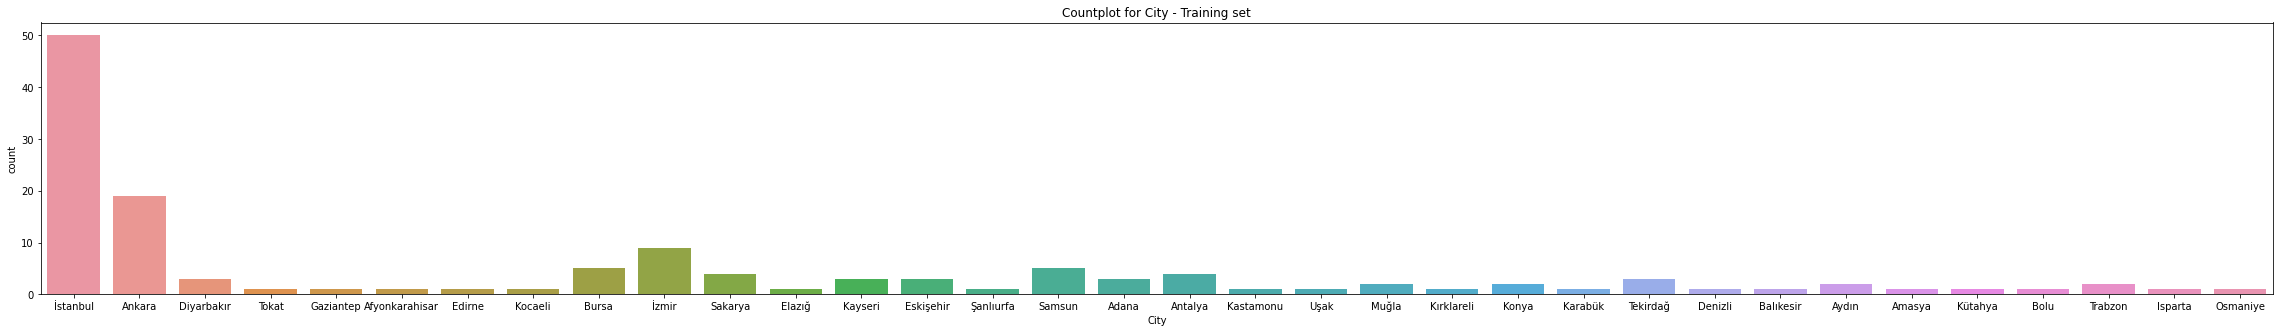

In [15]:
plt.figure(figsize=(40,5))
sns.countplot(x=train['City']).set_title("Countplot for City - Training set") 

Text(0.5, 1.0, 'Countplot for City - Testing set')

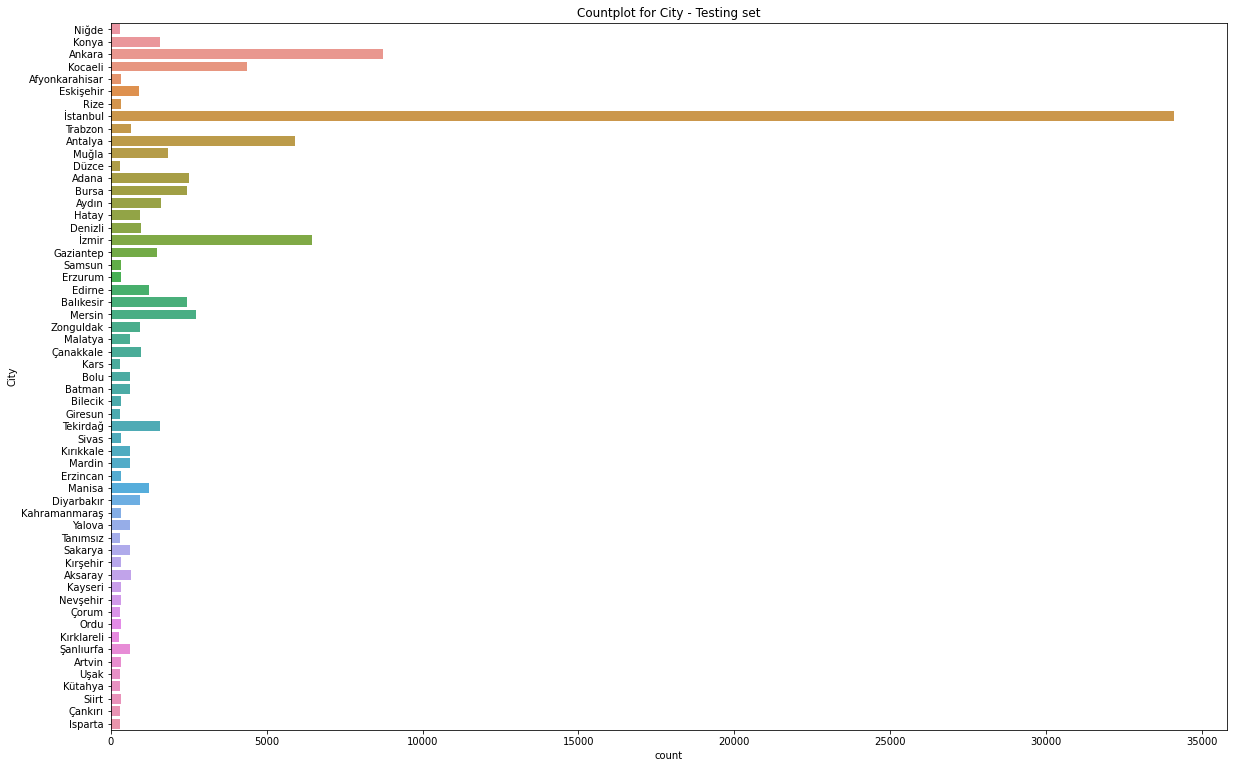

In [16]:
plt.figure(figsize=(20,13))
sns.countplot(y=test['City']).set_title("Countplot for City - Testing set")

In [17]:
print("Number of cities in training set :",train['City'].nunique())
print("Number of cities in testing set :",test['City'].nunique())

Number of cities in training set : 34
Number of cities in testing set : 57


From the above count plots of '**City**' feature, it appears that most of them prefer to open a new restaurant in cities like Istanbul, Ankara, Izmir. \
And there are around 23 cities in the testing set that are unseen in training data.

In [18]:
counts = train['City'].value_counts() #counts unique values
percent = ((train['City'].value_counts()/train['City'].value_counts().sum())*100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts,'percentage':percent}).head(5)

,count,percentage
İstanbul,50,36.5%
Ankara,19,13.9%
İzmir,9,6.6%
Bursa,5,3.6%
Samsun,5,3.6%


In [19]:
counts = test['City'].value_counts() #counts unique values
percent = ((test['City'].value_counts()/test['City'].value_counts().sum())*100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts,'percentage':percent}).head(5)

,count,percentage
İstanbul,34087,34.1%
Ankara,8720,8.7%
İzmir,6465,6.5%
Antalya,5911,5.9%
Kocaeli,4364,4.4%


Approx 60% of restaurants opened mainly in Istanbul,Ankara,izmir.

# **Numerical Features**

In [20]:
num_fea = train.drop(['Id','Open Date','City','City Group','Type','revenue'],axis=1)

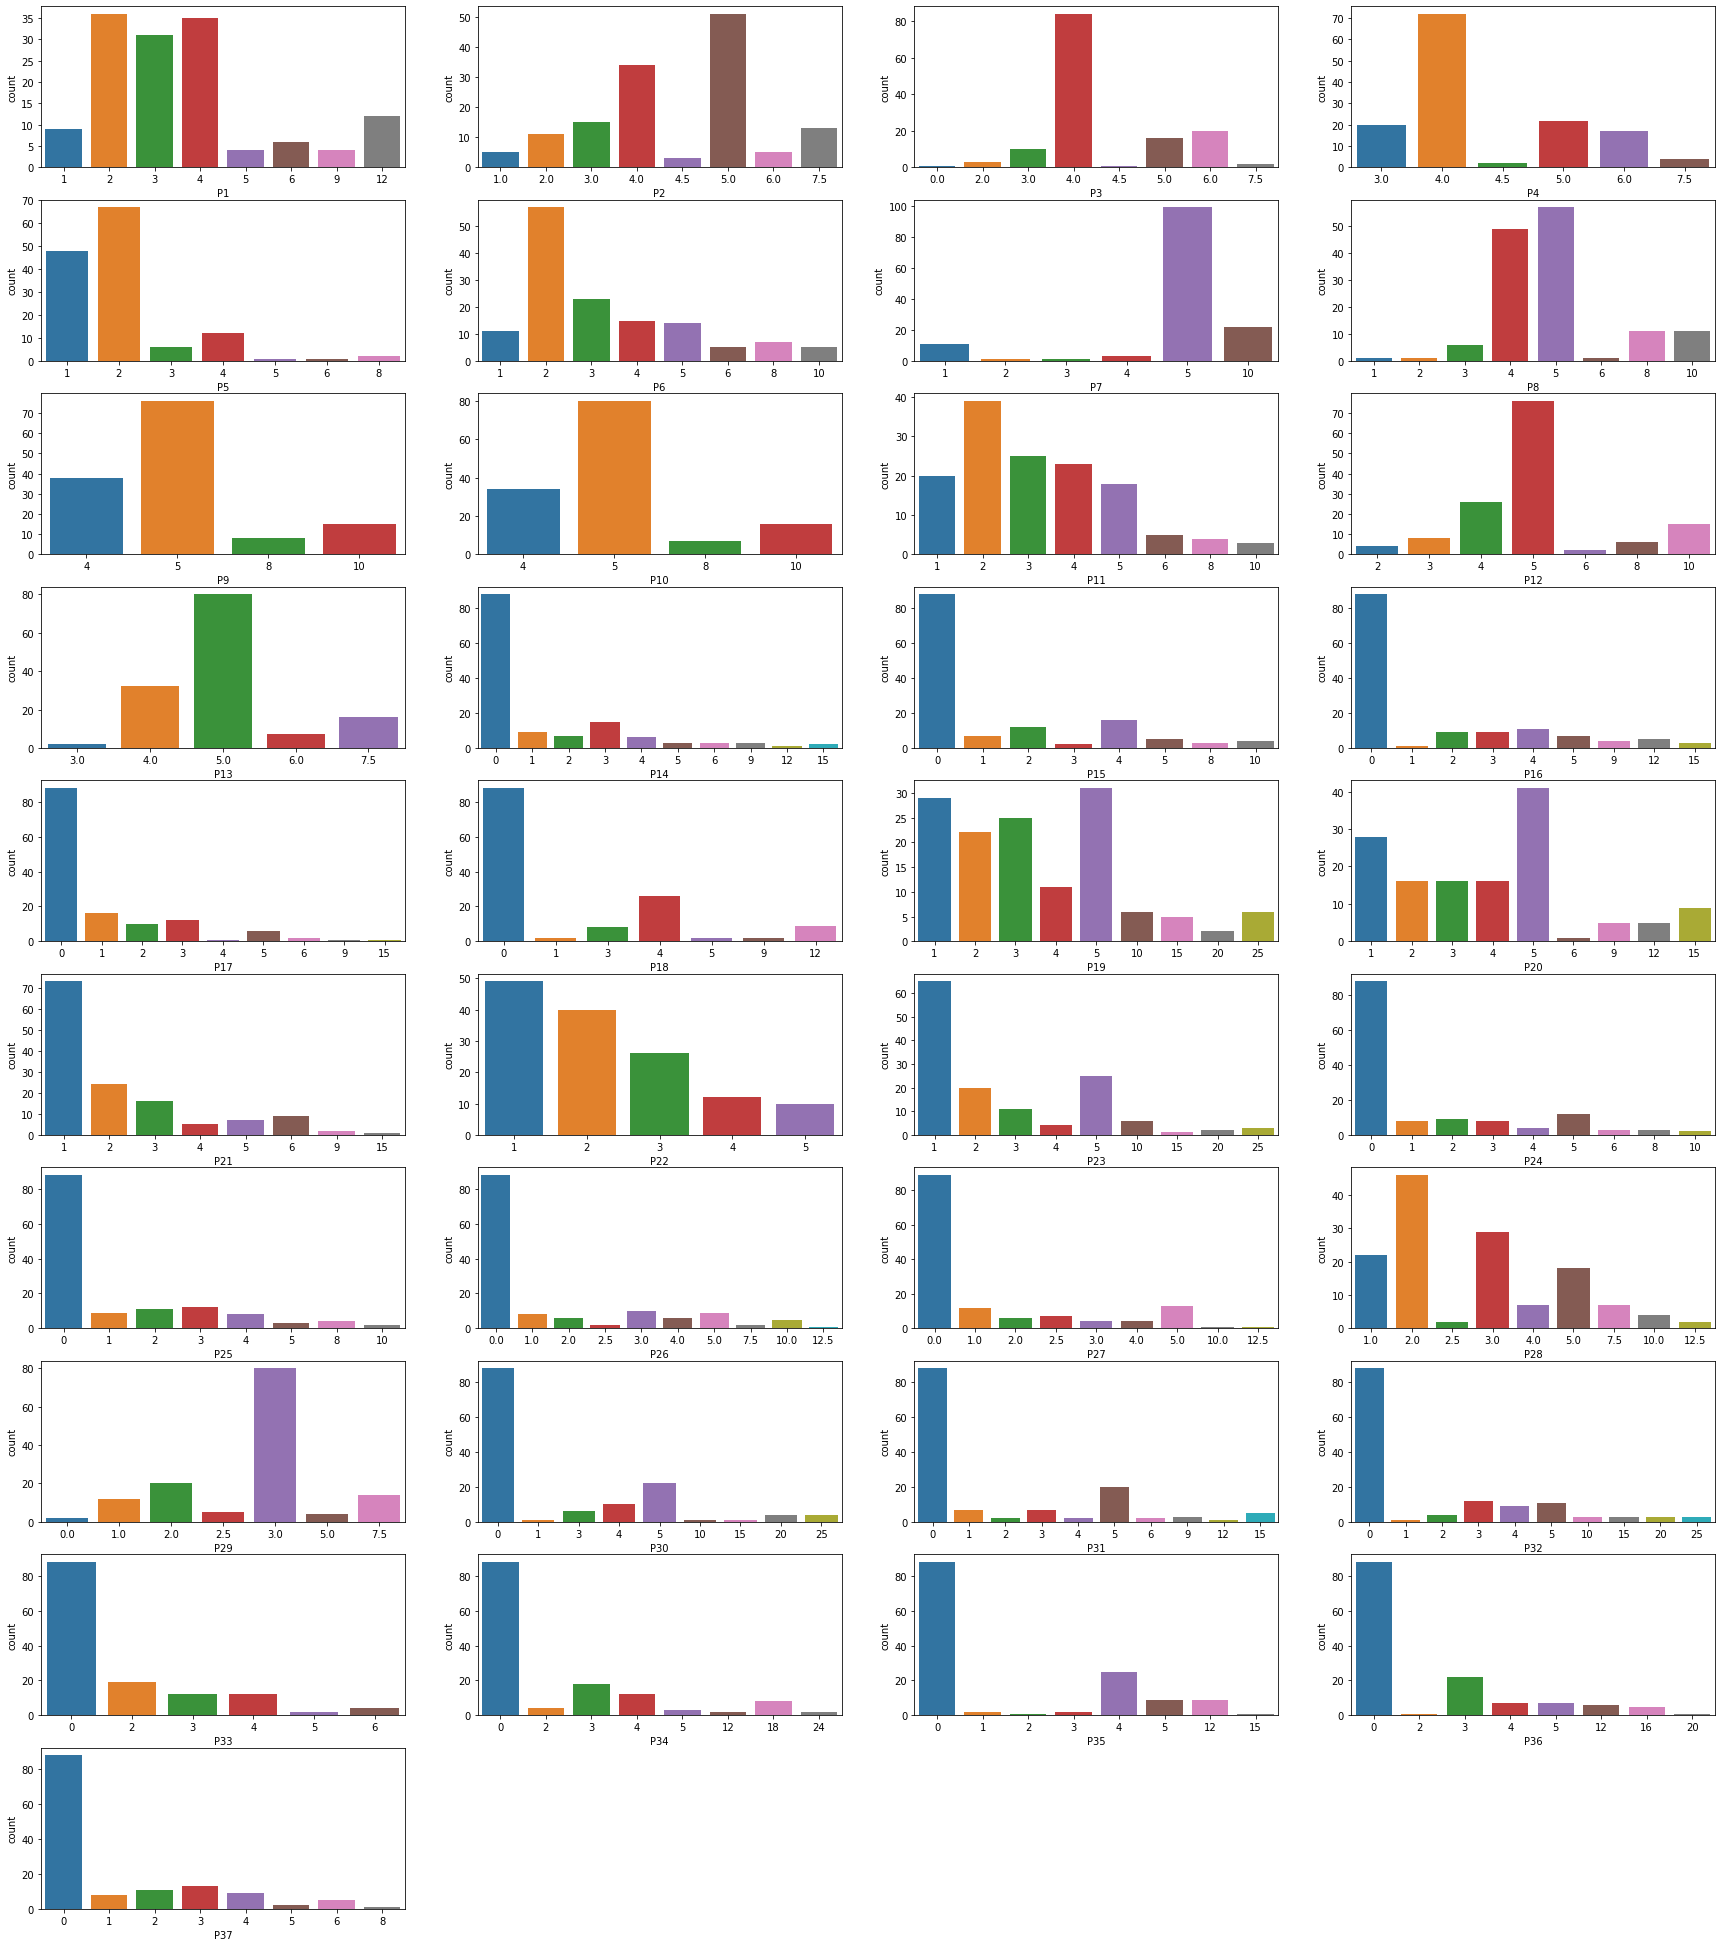

In [21]:
a = 10  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30,35))

for i in num_fea:
    plt.subplot(a, b, c)
    sns.countplot((num_fea[i]))
    c = c + 1

Dataset has total 37 p-variables (P1- P37): There are three categories of these obfuscated data. They are Demographic data, Real estate data and Commercial data. \
Among these 37 numeric features, majority value for few of them are zeros. We can consider this to be null value.  


**Type vs Revenue variable**

[Text(0.5, 1.0, 'Violinplot for Type vs Revenue')]

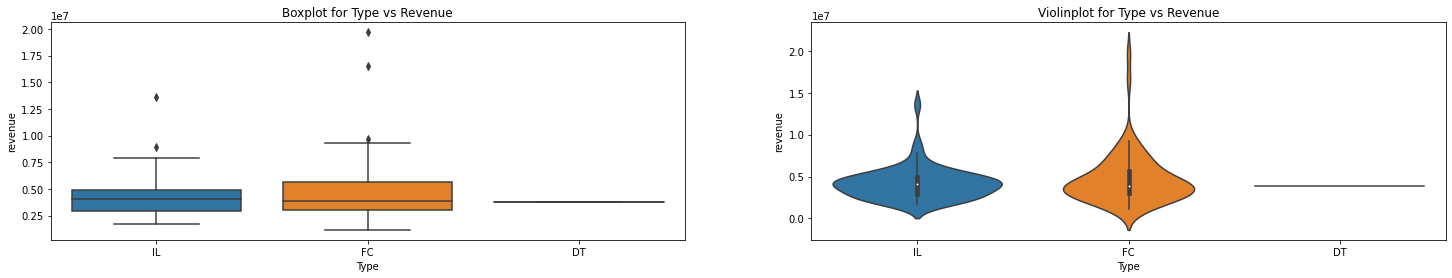

In [22]:
fig, ax = plt.subplots(1,2,figsize=(25,4))    
sns.boxplot(y=train['revenue'],x=train['Type'],ax=ax[0]).set(title='Boxplot for Type vs Revenue')
sns.violinplot(y=train['revenue'],x=train['Type'],ax=ax[1]).set(title='Violinplot for Type vs Revenue')

'FC'(FoodCourt) & 'IL'(Inline) are the preferred type of restaurants which are having similar distribution and also provides good revenue.



**City Group vs Revenue**

[Text(0.5, 1.0, 'City Group vs Revenue')]

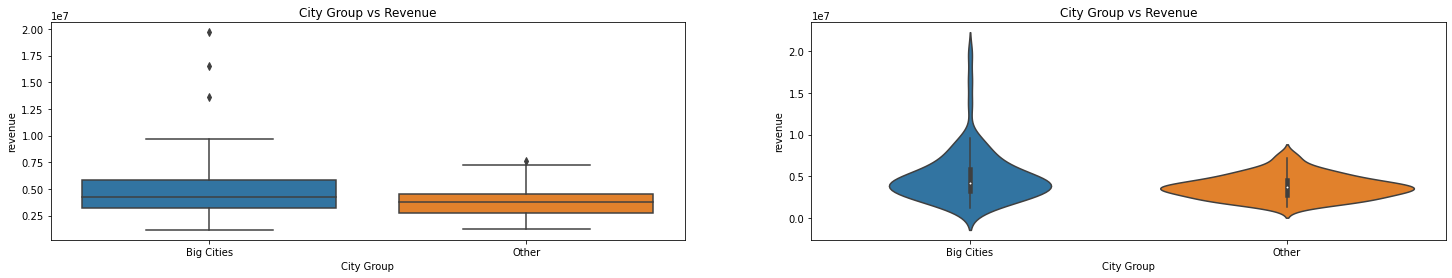

In [23]:
fig, ax = plt.subplots(1,2,figsize=(25,4))    
sns.boxplot(y=train['revenue'],x=train['City Group'],ax=ax[0]).set(title='City Group vs Revenue')
sns.violinplot(y=train['revenue'],x=train['City Group'],ax=ax[1]).set(title='City Group vs Revenue')

We can observe that few restaurants in 'Big Cities' are making a higher revenue margin. So opening a new restaurant in 'Big Cities' is preferred for getting high revenue.

**City vs Revenue**

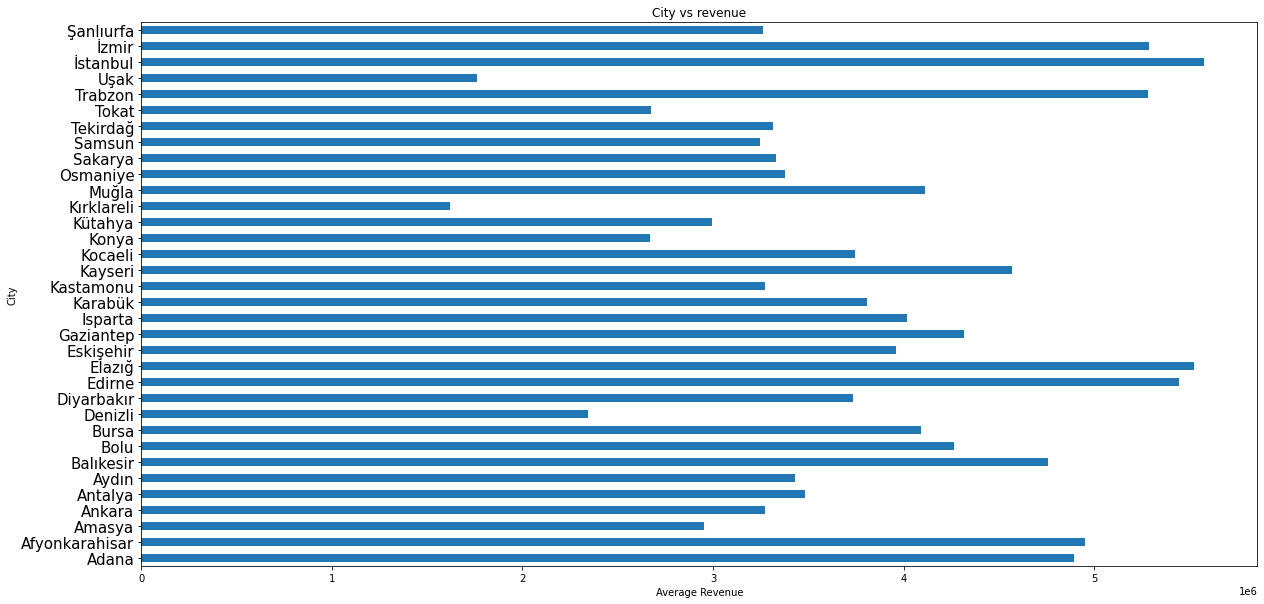

In [24]:
train.groupby(['City']).mean()['revenue'].plot.barh(figsize=(20,10))
plt.yticks(fontsize=15)
plt.title('City vs revenue')
plt.xlabel('Average Revenue')
plt.show()

Izmir, Istanbul, Elazig, and Edirne are the few cities where average revenue income is high for the restaurants

**P-variables vs Revenue**

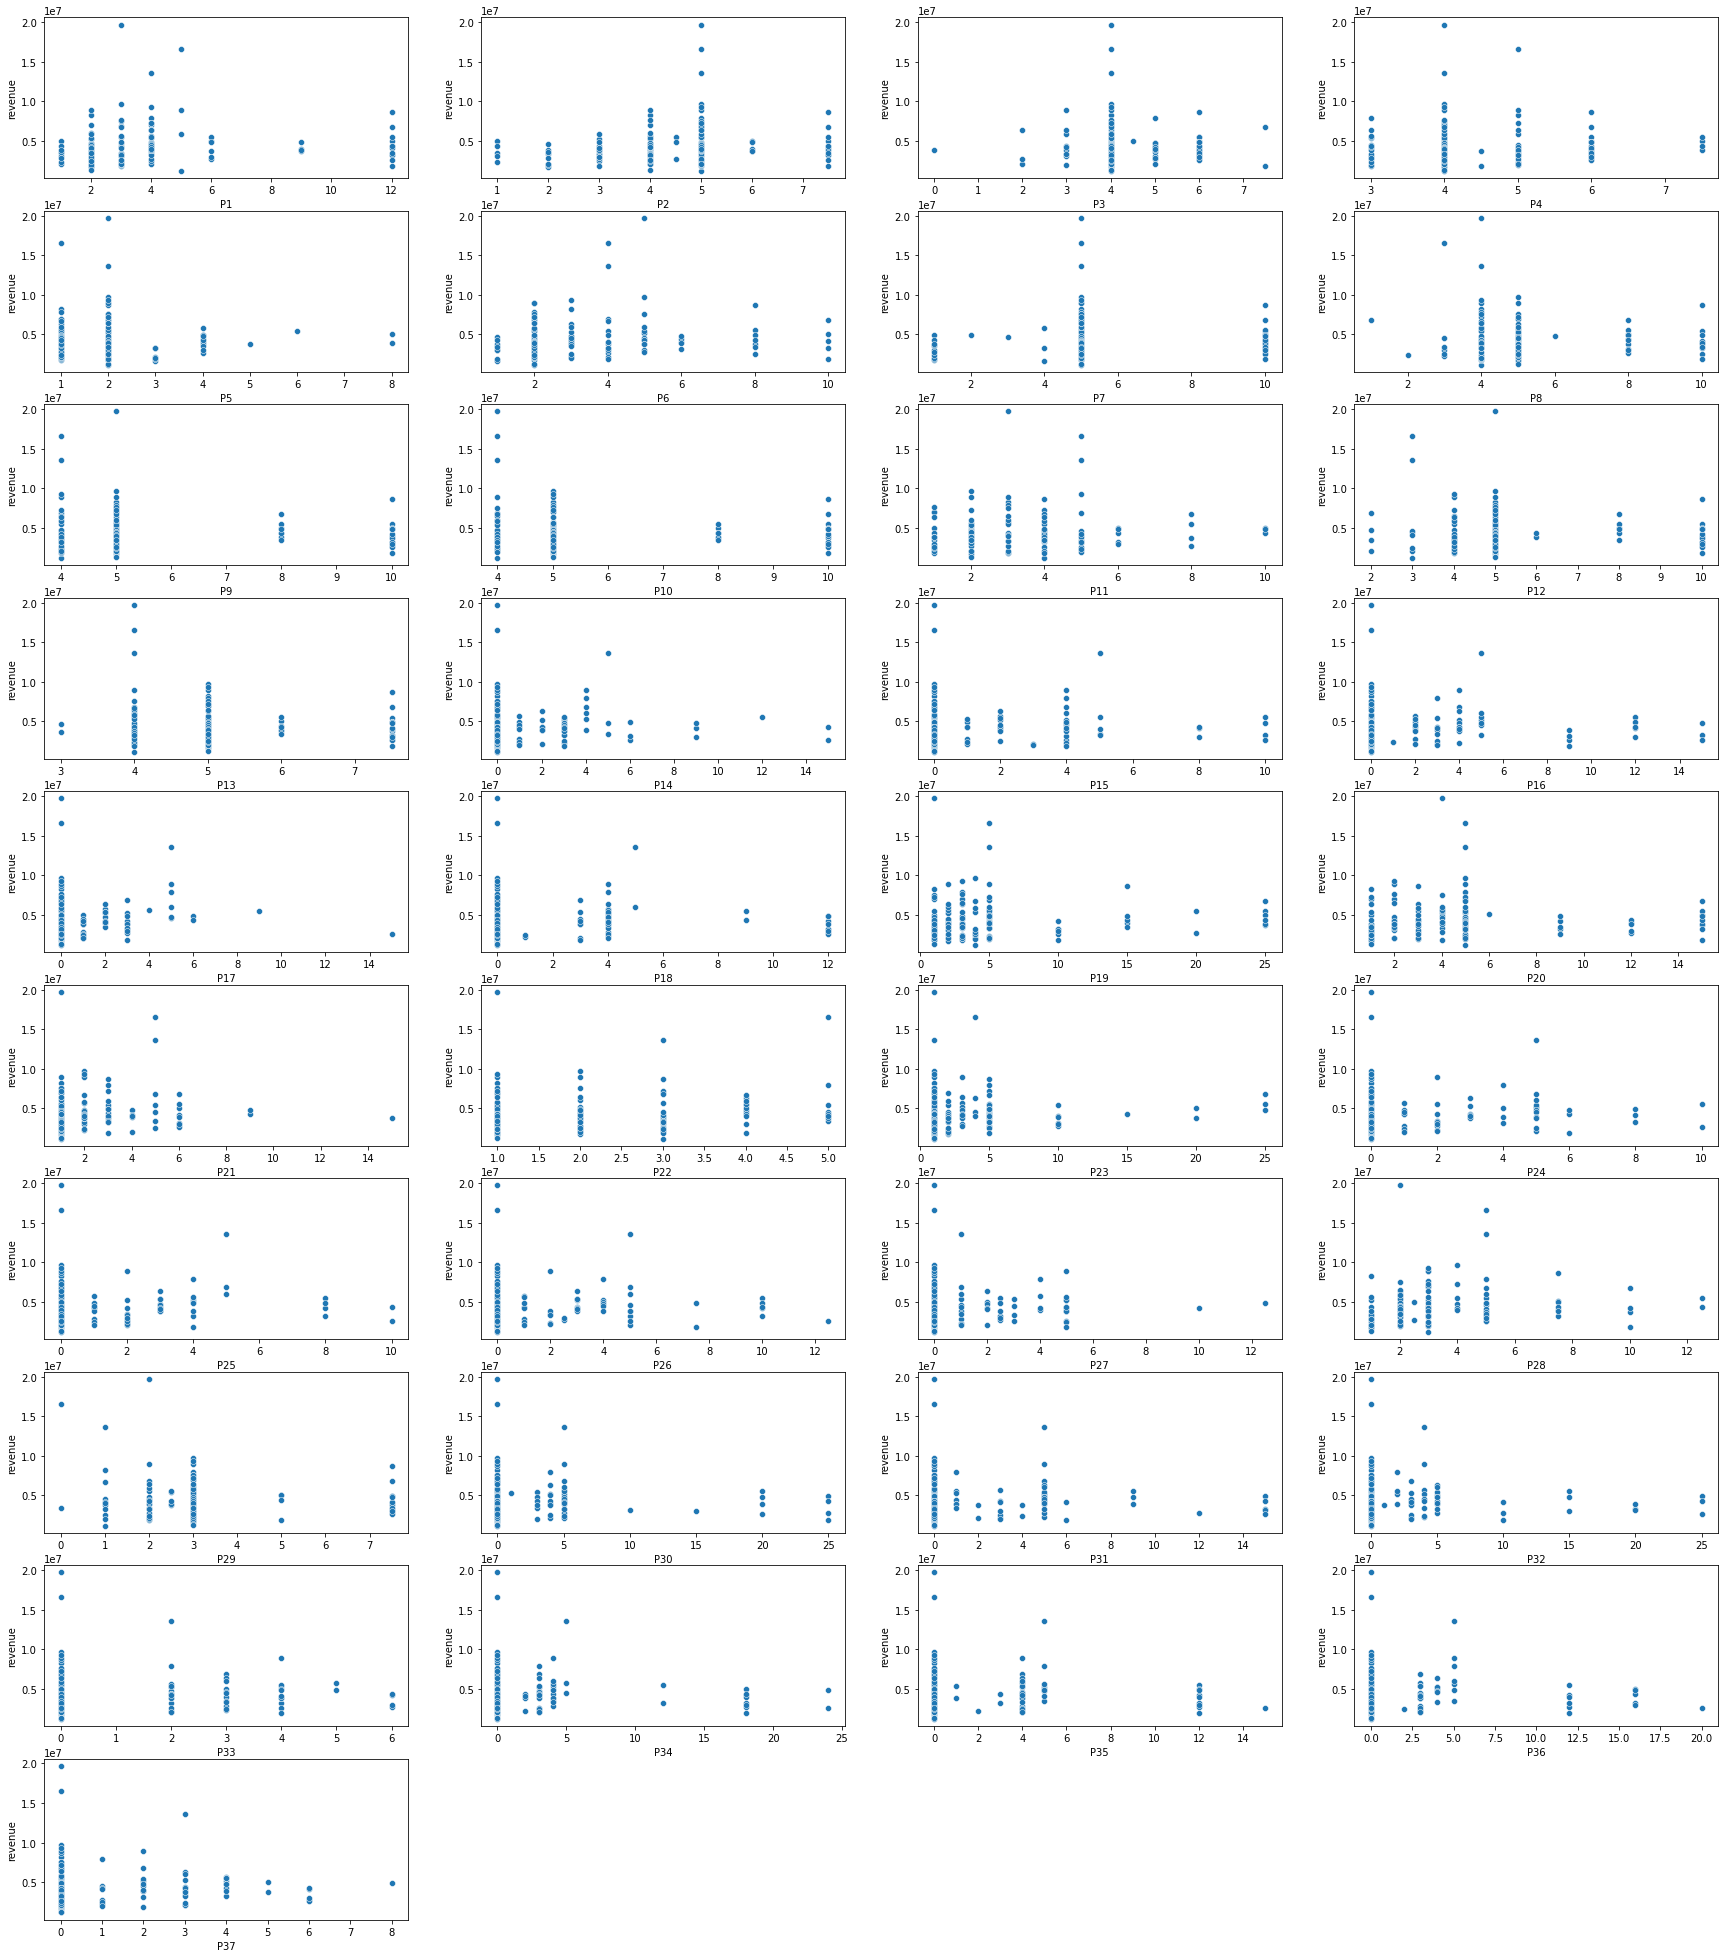

In [25]:
a = 10  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30,35))

for i in num_fea:
    plt.subplot(a, b, c)
    sns.scatterplot(y=train['revenue'],x=num_fea[i])
    c = c + 1

Here we can observe that most of these features are having little or no correlation with target variable. So we can drop those features.

**Adding new features from 'Open Date' variable**

In [26]:
#generating new features from 'Open Date' feature
def newFeatures(df):
  df['Date'] = pd.to_datetime(df['Open Date'],format="%m/%d/%Y")
  df['Year'] = df['Date'].dt.year
  df['Month'] = df['Date'].dt.month
  df['Years Old'] = pd.to_datetime('23-03-2015').year - df['Date'].dt.year
  df = df.drop(['Open Date','Date'],axis=1)
  return df

train = newFeatures(train)
test = newFeatures(test)

In [27]:
test.head(2)

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Year,Month,Years Old
0,0,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2011,1,4
1,1,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2011,3,4


In [28]:
#Reordering columns
train = train[['Id','City','City Group','Type','Year','Month','Years Old','P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24','P25','P26','P27','P28','P29','P30','P31','P32','P33','P34','P35','P36','P37','revenue']]
test = test[['Id','City','City Group','Type','Year','Month','Years Old','P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24','P25','P26','P27','P28','P29','P30','P31','P32','P33','P34','P35','P36','P37']]

In [29]:
test['Year'].unique()

array([2011, 2013, 2007, 2008, 2006, 2012, 2004, 1998, 2009, 2000, 1996,
       2010, 2005, 1997, 2002, 1995, 2001, 1999, 2003, 2014])

**Analyzing Year**

Text(0.5, 1.0, 'Year vs Revenue')

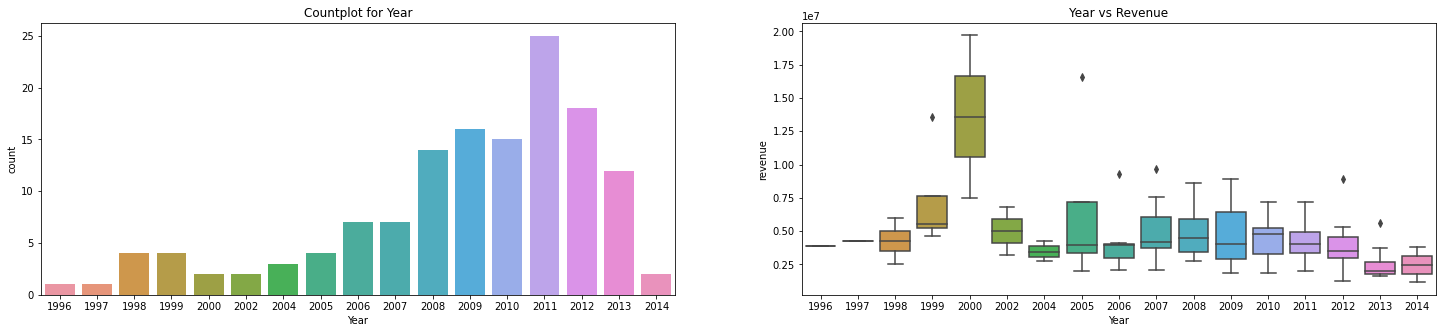

In [30]:
fig, ax = plt.subplots(1,2,figsize=(25,5))   
sns.countplot(x=train['Year'],ax=ax[0])
ax[0].set_title("Countplot for Year")

sns.boxplot(y=train['revenue'],x=train['Year'],ax=ax[1]).set_title("Year vs Revenue")

Mostly, new restaurants are opened between years 2008-2013 and in the year 2000, restaurants experienced a higher revenue.

**Analyzing Month**

Text(0.5, 1.0, 'Distribution of Month vs Revenue')

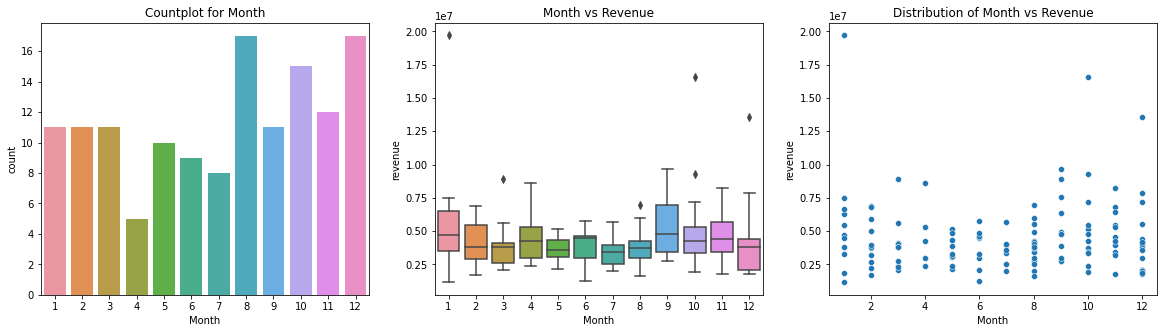

In [31]:
fig, ax = plt.subplots(1,3,figsize=(20,5))   
sns.countplot(x=train['Month'],ax=ax[0]).set_title("Countplot for Month")

sns.boxplot(x=train['Month'],y=train['revenue'],ax=ax[1])
ax[1].set_title("Month vs Revenue")

sns.scatterplot(x=train['Month'],y=train['revenue'],ax=ax[2])
ax[2].set_title("Distribution of Month vs Revenue")

Mostly new restaurants are opening during August and December. \
Restaurants are having good revenue during April and September months.

# **Interaction Variables**

**City and Year** *(Vs)*  **Revenue**

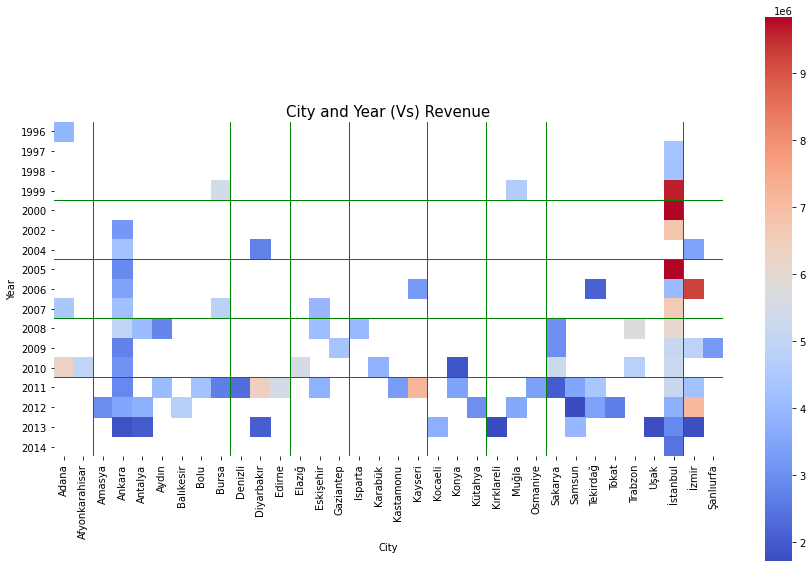

In [32]:
df = pd.DataFrame({'City':train['City'],'Year':train['Year'],'revenue':train['revenue']})

df_wide=df.pivot_table( index='Year', columns='City', values='revenue' )

fig, ax = plt.subplots(figsize=(15,10))         #linecolors can be 'r', 'g', 'b', 'k', 'y', 'm', 'c'
plot = sns.heatmap(df_wide, annot=False,linewidths=.001,linecolor='g',ax=ax,cmap='coolwarm',robust=True, square=True) #annot=True writes data in rect boxes
plt.title('City and Year (Vs) Revenue',size=15)
plt.show()

Key insights obtained from the above graph is that among other cities 'Istanbul' is the city which provides the highest revenue and also most of them are preferring to open new restaurants almost every year since 1997. 'Ankara' & 'Izmir' are the cities which provide good revenue and next to 'Istanbul' these are the most preferable cities for opening a new restaurant every year.

**Type and Year** *(Vs)*  **Revenue**

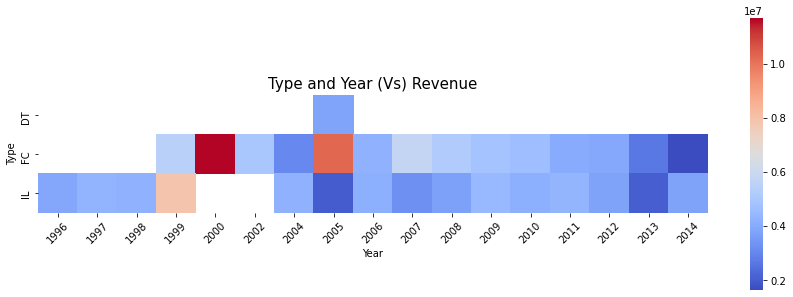

In [33]:
df = pd.DataFrame({'Type':train['Type'],'Year':train['Year'],'revenue':train['revenue']})

df_wide=df.pivot_table( index='Type', columns='Year', values='revenue' )

fig, ax = plt.subplots(figsize=(15,5))         # Sample figsize in inches
plot = sns.heatmap(df_wide, annot=False,ax=ax,cmap='coolwarm',robust=True, square=True,) #annot=True writes data in rect boxes        
plot.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Type and Year (Vs) Revenue',size=15)
plt.show()                   

Almost every year mostly new restaurants prefer either 'FC'(Food Court) or 'IL' (Inline) as their restaurant type. The average revenue for both of these restaurant types is similar. 

**City Group and Year** *(Vs)*  **Revenue**

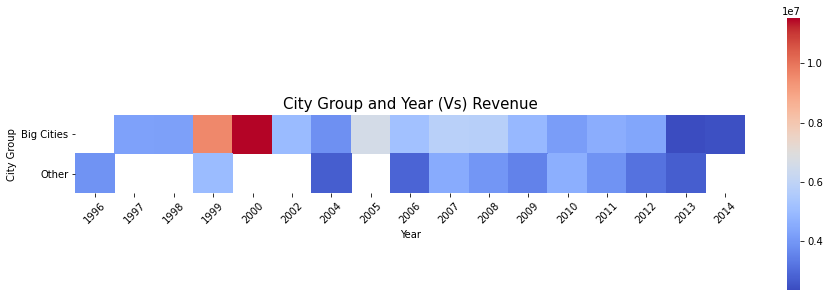

In [34]:
df = pd.DataFrame({'City Group':train['City Group'],'Year':train['Year'],'revenue':train['revenue']})

df_wide=df.pivot_table( index='City Group', columns='Year', values='revenue' )

fig, ax = plt.subplots(figsize=(15,5))         # Sample figsize in inches
plot = sns.heatmap(df_wide, annot=False,ax=ax,cmap='coolwarm',robust=True, square=True,) #annot=True writes data in rect boxes
plot.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('City Group and Year (Vs) Revenue',size=15)
plt.show()

We can observe that since 1997 every year a few restaurants are opening in 'Big Cities' and also there is good revenue between year 1997-2012.

 **City and City Group** *(Vs)*  **Revenue**

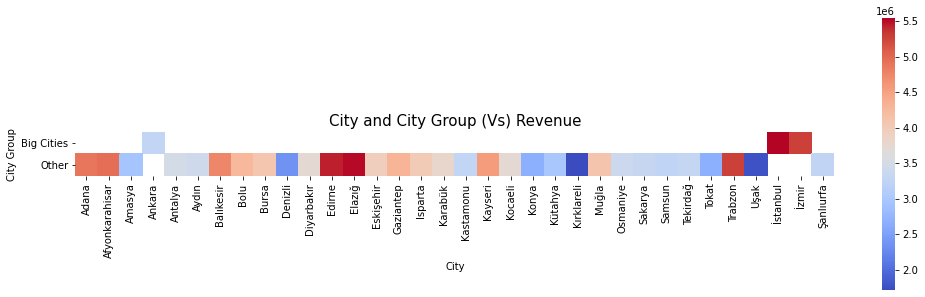

In [35]:
df = pd.DataFrame({'City Group':train['City Group'],'City':train['City'],'revenue':train['revenue']})

df_wide=df.pivot_table( index='City Group', columns='City', values='revenue')

fig, ax = plt.subplots(figsize=(17,5))         # Sample figsize in inches
plot = sns.heatmap(df_wide, annot=False,ax=ax,cmap='coolwarm',robust=True, square=True) #annot=True writes data in rect boxes
plt.title('City and City Group (Vs) Revenue',size=15)
plt.show()

The key insight from this plot is that only Ankara, Istanbul, and Izmir are the Big Cities. \
Among other cities Edime, Elazig, and Trabzon provide higher revenue. 

**City and Type** *(Vs)*  **Revenue**

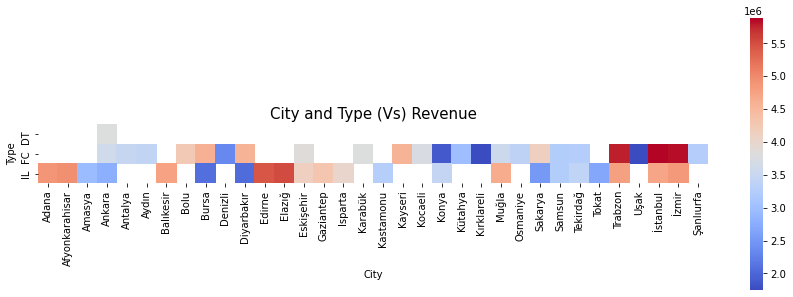

In [36]:
df = pd.DataFrame({'Type':train['Type'],'City':train['City'],'revenue':train['revenue']})

df_wide=df.pivot_table( index='Type', columns='City', values='revenue')

fig, ax = plt.subplots(figsize=(15,5))         # Sample figsize in inches
plot = sns.heatmap(df_wide, annot=False,ax=ax,cmap='coolwarm',robust=True, square=True,) #annot=True writes data in rect boxes
plt.title('City and Type (Vs) Revenue',size=15)
plt.show()

In 'Big cities' like Istanbul, Izmir, and Ankara preference can be given to 'FC'(Food Court) restaurant type to maximize the revenue. 

**Correlation Matrix**

In [37]:
!pip install phik

     |████████████████████████████████| 604kB 7.6MB/s 
     |████████████████████████████████| 27.4MB 162kB/s 
  Created wheel for phik: filename=phik-0.11.1-cp37-none-any.whl size=599822 sha256=bf891b502bd17528a2907c10cd1932ea40bf144b3c2878683d0b6979c22692ee
  Stored in directory: /root/.cache/pip/wheels/0e/c8/42/68bc8b9d86a040d84c1c76fa0104f6e0c89754595843093525
Successfully built phik
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


interval columns not set, guessing: ['Year', 'Month', 'Years Old', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue']


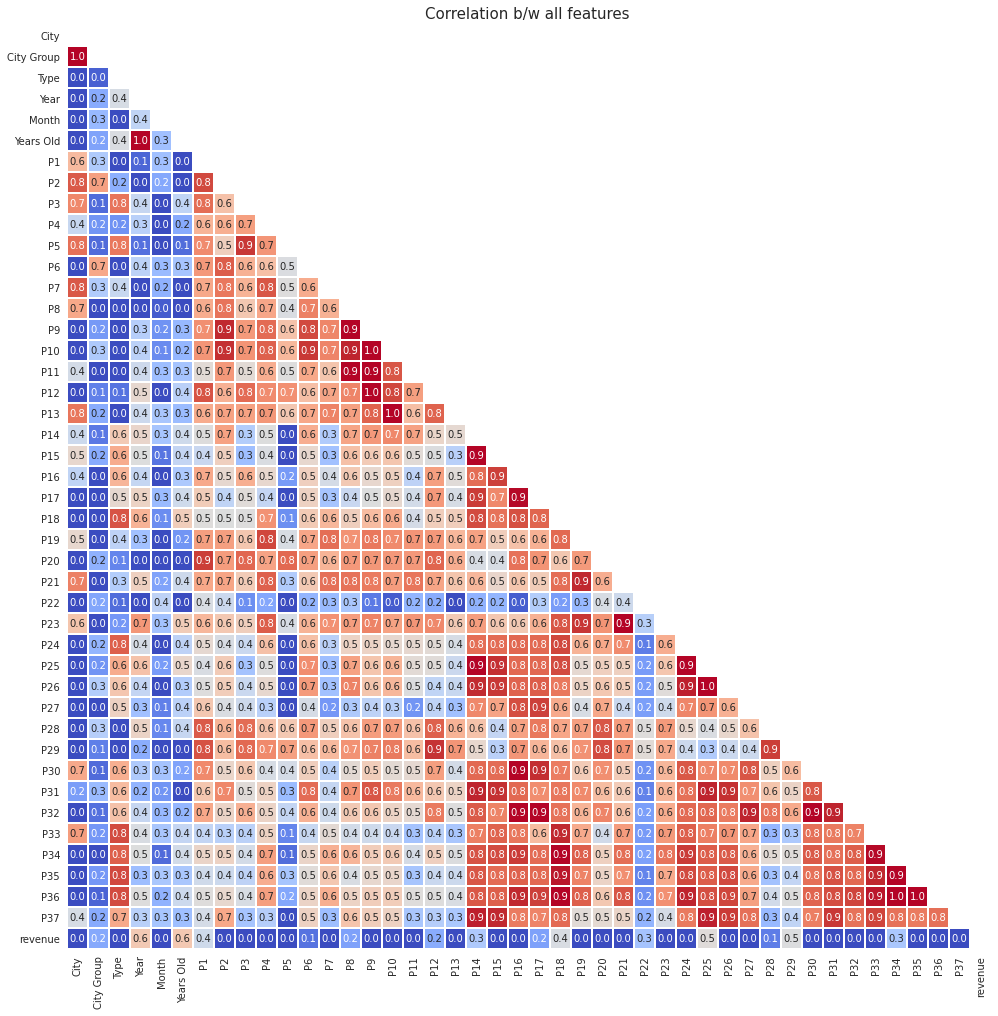

In [38]:
#https://phik.readthedocs.io/en/latest/
#http://alanpryorjr.com/visualizations/seaborn/heatmap/heatmap/
#https://python-graph-gallery.com/90-heatmaps-with-various-input-format/
import phik
#Phi_corr = train.drop(['Id','Open Date'],axis=1).phik_matrix()
Phi_corr = train.drop(['Id'],axis=1).phik_matrix()

mask = np.zeros_like(Phi_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  fig, ax = plt.subplots(figsize=(20,17))         # Sample figsize in inches
  plot = sns.heatmap(Phi_corr, mask=mask, annot=True, fmt='.1f',linewidths=.5, ax=ax,cmap='coolwarm',robust=True, square=True,cbar=False) #annot=True writes data in rect boxes
  plt.title('Correlation b/w all features ',size = 15)
  plt.show()


From the above correlation matrix it is clear that most of the numerical features are having less or no correlation with 'revenue' variable. \
Most of the numerical features between P1-P37 are highly correlated with each other. It means a small change in one feature impacts changes in another feature.

In [39]:
print('\033[1m' + "Below are the top 15 correlated features to 'revenue' variable" + '\033[0m')
print(Phi_corr['revenue'].sort_values(ascending=False)[0:15])

Below are the top 15 correlated features to 'revenue' variable
revenue       1.000000
Years Old     0.564357
Year          0.560451
P25           0.469105
P29           0.453830
P18           0.443511
P1            0.411839
P14           0.319217
P34           0.306566
P22           0.292312
P12           0.219537
City Group    0.213535
P8            0.194137
P17           0.191183
P28           0.106898
Name: revenue, dtype: float64


## **SUMMARY:**



**Provided a dataset with 137 restaurants in the training phase and 100,000 restaurants for the testing phase.** \
**The target variable 'revenue' is skewed towards the right. This might be due to the presence of outliers. Hence, we applied a logarithmic transformation on the revenue feature to make them normally distributed.**

> **Type:**

Food Court(FC) & Inline(IL) are the most preferred **restaurant types**, while Drive-Thru and Mobile are the restaurant types where even most of the cities don't prefer.
Restaurant Type FC(food court) yields high revenue in Big cities. 

> **City:**

Around 60% of restaurants opened mainly in Istanbul, Ankara, Izmir. \
Istanbul is the city that provides the highest revenue and is the most preferred city to open a new restaurant.

> **City Group:**

The key insight is that **Big Cities** includes only Ankara, Istanbul, and Izmir. \
Edime, Elazig, and Trabzon are the **Other cities** that provide higher revenue.


> **Month:**

Mostly, new restaurants are opening during August and December. \
Restaurants are having good revenue during April and September months


> **P1-P37:**

Dataset has a total of 37 p-variables (P1- P37): There are three categories of these obfuscated data. They are Demographic data, Real estate data, and Commercial data.
Some of these 'P' features are highly correlated with each other and having less or no correlation with the 'revenue' variable. So these features can be neglected.
















Handling Outliers

In [40]:
#Even after logarithmic transformation of 'revenue' variable still there exists skewness. So lets drop few outliers.
train = train[train['revenue']<train['revenue'].quantile(0.98)] 

Text(0.5, 1.0, 'Distribution plot for revenue')

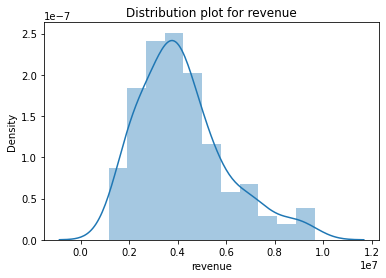

In [41]:
#After dropping outliers distribution looks good
ax = sns.distplot(train['revenue'])
ax.set_title("Distribution plot for revenue") 

In [42]:
X_train = train.drop(['Id','revenue'],axis=1)
X_test = test.drop('Id',axis=1)
y_train = train['revenue']
log_y_train = np.log(train['revenue'])

Handling numerical

In [43]:
#To find highly correlated independent features.
num_fea = X_train.drop(['City Group','Type'],axis=1)
corr = train.corr()

In [44]:
#https://www.dezyre.com/recipes/drop-out-highly-correlated-features-in-python
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))  #numerical features that are highly correlated with each other
corr_col = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

Phi_corrFea = (Phi_corr['revenue'].sort_values(ascending=False)==0) #Features that have zero or no correlation with target variable
no_cor = [col for col in X_train.columns if Phi_corrFea[col]==True]

drop_num = [col for col in corr_col if col not in no_cor]  #Dropping Features that are having zero correlation with the target variable but are highly correlated with other variables  
drop_num

['P12', 'P17', 'P18', 'P25', 'P28', 'P34']

In [45]:
X_train = X_train.drop(drop_num,axis=1)
X_test = X_test.drop(drop_num,axis=1)
X_train.head(1)

,City,City Group,Type,Year,Month,Years Old,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P13,P14,P15,P16,P19,P20,P21,P22,P23,P24,P26,P27,P29,P30,P31,P32,P33,P35,P36,P37
0,İstanbul,Big Cities,IL,1999,7,16,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5.0,1,2,2,5,4,1,3,3,1,1.0,4.0,3.0,5,3,4,5,4,3,4


Handling categorical

In [46]:
#City can be dropped because there are 23 cities in test that are unseen during training phase
X_train = X_train.drop(['City'],axis=1)
X_test = X_test.drop(['City'],axis=1)
X_train.head(10)

,City Group,Type,Year,Month,Years Old,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P13,P14,P15,P16,P19,P20,P21,P22,P23,P24,P26,P27,P29,P30,P31,P32,P33,P35,P36,P37
0,Big Cities,IL,1999,7,16,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5.0,1,2,2,5,4,1,3,3,1,1.0,4.0,3.0,5,3,4,5,4,3,4
1,Big Cities,FC,2008,2,7,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5.0,0,0,0,3,2,1,3,2,0,0.0,0.0,3.0,0,0,0,0,0,0,0
2,Other,IL,2013,3,2,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5.0,0,0,0,1,1,1,1,1,0,0.0,0.0,3.0,0,0,0,0,0,0,0
3,Other,IL,2012,2,3,6,4.5,6.0,6.0,4,4,10,8,10,10,8,7.5,6,4,9,20,12,6,1,10,2,2.5,2.5,7.5,25,12,10,6,12,12,6
4,Other,IL,2009,5,6,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5.0,2,1,2,2,2,1,2,1,2,3.0,5.0,3.0,5,1,3,2,4,3,3
5,Big Cities,FC,2010,2,5,6,6.0,4.5,7.5,8,10,10,8,8,8,10,6.0,0,0,0,5,6,3,1,5,0,0.0,0.0,5.0,0,0,0,0,0,0,0
6,Big Cities,IL,2010,10,5,2,3.0,4.0,4.0,1,5,5,5,5,5,2,5.0,3,4,4,2,4,1,2,1,5,4.0,5.0,3.0,4,5,2,2,5,4,4
7,Big Cities,IL,2011,6,4,4,5.0,4.0,5.0,2,3,5,4,4,4,4,4.0,0,0,0,3,5,2,4,2,0,0.0,0.0,2.0,0,0,0,0,0,0,0
8,Other,IL,2010,8,5,1,1.0,4.0,4.0,1,2,1,5,5,5,1,5.0,1,1,2,1,1,1,1,1,4,4.0,2.0,3.0,4,5,5,3,5,4,5
9,Other,IL,2011,11,4,6,4.5,6.0,7.5,6,4,10,10,10,10,2,7.5,0,0,0,25,3,3,1,10,0,0.0,0.0,2.5,0,0,0,0,0,0,0


In [47]:
def catFea(df):
  labelEncoding = LabelEncoder()
  df['City Group'] = labelEncoding.fit_transform(df['City Group'].astype('str'))
  df['Type'] = labelEncoding.fit_transform(df['Type'].astype('str'))
  return df

X_train = catFea(X_train)
X_test = catFea(X_test)
X_train.head(10)

,City Group,Type,Year,Month,Years Old,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P13,P14,P15,P16,P19,P20,P21,P22,P23,P24,P26,P27,P29,P30,P31,P32,P33,P35,P36,P37
0,0,2,1999,7,16,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5.0,1,2,2,5,4,1,3,3,1,1.0,4.0,3.0,5,3,4,5,4,3,4
1,0,1,2008,2,7,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5.0,0,0,0,3,2,1,3,2,0,0.0,0.0,3.0,0,0,0,0,0,0,0
2,1,2,2013,3,2,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5.0,0,0,0,1,1,1,1,1,0,0.0,0.0,3.0,0,0,0,0,0,0,0
3,1,2,2012,2,3,6,4.5,6.0,6.0,4,4,10,8,10,10,8,7.5,6,4,9,20,12,6,1,10,2,2.5,2.5,7.5,25,12,10,6,12,12,6
4,1,2,2009,5,6,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5.0,2,1,2,2,2,1,2,1,2,3.0,5.0,3.0,5,1,3,2,4,3,3
5,0,1,2010,2,5,6,6.0,4.5,7.5,8,10,10,8,8,8,10,6.0,0,0,0,5,6,3,1,5,0,0.0,0.0,5.0,0,0,0,0,0,0,0
6,0,2,2010,10,5,2,3.0,4.0,4.0,1,5,5,5,5,5,2,5.0,3,4,4,2,4,1,2,1,5,4.0,5.0,3.0,4,5,2,2,5,4,4
7,0,2,2011,6,4,4,5.0,4.0,5.0,2,3,5,4,4,4,4,4.0,0,0,0,3,5,2,4,2,0,0.0,0.0,2.0,0,0,0,0,0,0,0
8,1,2,2010,8,5,1,1.0,4.0,4.0,1,2,1,5,5,5,1,5.0,1,1,2,1,1,1,1,1,4,4.0,2.0,3.0,4,5,5,3,5,4,5
9,1,2,2011,11,4,6,4.5,6.0,7.5,6,4,10,10,10,10,2,7.5,0,0,0,25,3,3,1,10,0,0.0,0.0,2.5,0,0,0,0,0,0,0


In [48]:
print(X_train.shape,' ',X_test.shape)

(134, 36)   (100000, 36)


Stanadard Scaler follows standard normal distribution where mean is centered to zero and scales data to unit variance

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

As there is high dimensionality in data we can use Principal Component Analysis(PCA). It helps in reducing the dimensions of data and focus on the ones with the largest variance components.


In [50]:
from sklearn.decomposition import PCA
#https://www.geeksforgeeks.org/principal-component-analysis-with-python/
#pca = PCA(n_components = 5)
pca = PCA(n_components = 10)
X_train_PCA = pca.fit_transform(X_train) 
X_test_PCA = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_ 
explained_variance
#first five components explains around 90% variance in the data.

array([0.552491  , 0.15696576, 0.09850224, 0.04321622, 0.02928459,
       0.020064  , 0.01527056, 0.01276883, 0.01239888, 0.00875576])